## Quickstart

[![Open In Colab](https://img.shields.io/badge/Open%20In-Colab-blue?style=for-the-badge&logo=google-colab)](https://colab.research.google.com/github/dnth/x.infer/blob/main/docs/examples/quickstart.ipynb)
[![Open In Kaggle](https://img.shields.io/badge/Open%20In-Kaggle-blue?style=for-the-badge&logo=kaggle)](https://kaggle.com/kernels/welcome?src=https://github.com/dnth/x.infer/blob/main/docs/examples/quickstart.ipynb)

This notebook shows how to get started with using x.infer.

x.infer relies on PyTorch and torchvision, so make sure you have it installed on your system. Uncomment the following line to install it.

In [ ]:
# !pip install -Uqq torch torchvision

Let's check if PyTorch is installed by checking the version.

In [1]:
import torch

torch.__version__

'2.2.0+cu121'

Also let's check if CUDA is available.

In [2]:
torch.cuda.is_available()

True

x.infer relies on various optional dependencies like transformers, ultralytics, timm, etc.
You don't need to install these dependencies if you don't want to. Just install x.infer with the dependencies you want.

For example, if you'd like to use models from the transformers library, you can install the `transformers` extra:


```bash
pip install -Uqq "xinfer[transformers]"
```

To install all the dependencies, you can run:
```bash
pip install -Uqq "xinfer[all]"
```

For this example, we'll install all the dependencies.

In [3]:
!pip install -Uqq "xinfer[all]"

It's recommended to restart the kernel once all the dependencies are installed. Uncomment the following line to restart the kernel.

In [ ]:
# from IPython import get_ipython
# get_ipython().kernel.do_shutdown(restart=True)

Once completed, let's import x.infer, check the version and list all the models available.

In [4]:
import xinfer

print(xinfer.__version__)
xinfer.list_models()

0.0.7


                                     Available Models                                     
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Implementation ┃ Model ID                                        ┃ Input --> Output    ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ timm           │ eva02_large_patch14_448.mim_m38m_ft_in22k_in1k  │ image --> class     │
│ timm           │ eva02_large_patch14_448.mim_m38m_ft_in1k        │ image --> class     │
│ timm           │ eva02_large_patch14_448.mim_in22k_ft_in22k_in1k │ image --> class     │
│ timm           │ eva02_large_patch14_448.mim_in22k_ft_in1k       │ image --> class     │
│ timm           │ eva02_base_patch14_448.mim_in22k_ft_in22k_in1k  │ image --> class     │
│ timm           │ eva02_base_patch14_448.mim_in22k_ft_in1k        │ image --> class     │
│ timm           │ eva02_small_patch14_336.mim_in22k_ft_in1k       │ image --> class     │
│ timm           │ eva02_tiny_patch14_336.mim_in22k_ft_in1k        │ image --> class     │
│ transformers   │ Salesforce/blip2-opt-6.7b-coco                  │ image-text --> text │
│ transformers   │ Salesforce/blip2-flan-t5-xxl                    │ image-text --> text │
│ transformers   │ Salesforce/blip2-opt-6.7b                       │ image-text --> text │
│ transformers   │ Salesforce/blip2-opt-2.7b                       │ image-text --> text │
│ transformers   │ fancyfeast/llama-joycaption-alpha-two-hf-llava  │ image-text --> text │
│ transformers   │ vikhyatk/moondream2                             │ image-text --> text │
│ transformers   │ sashakunitsyn/vlrm-blip2-opt-2.7b               │ image-text --> text │
│ ultralytics    │ yolov8x                                         │ image --> objects   │
│ ultralytics    │ yolov8m                                         │ image --> objects   │
│ ultralytics    │ yolov8l                                         │ image --> objects   │
│ ultralytics    │ yolov8s                                         │ image --> objects   │
│ ultralytics    │ yolov8n                                         │ image --> objects   │
│ ...            │ ...                                             │ ...                 │
│ ...            │ ...                                             │ ...                 │
└────────────────┴─────────────────────────────────────────────────┴─────────────────────┘

You can pick any model from the list of models available.
Let's create a model from the `vikhyatk/moondream2` model. We can optionally specify the device and dtype. By default, the model is created on the CPU and the dtype is `float32`.

Since we have GPU available, let's create the model on the GPU and use `float16` precision.

In [5]:
model = xinfer.create_model("vikhyatk/moondream2", device="cuda", dtype="float16")

2024-10-21 22:37:07.833 | INFO     | xinfer.transformers.moondream:__init__:24 - Model: vikhyatk/moondream2
2024-10-21 22:37:07.835 | INFO     | xinfer.transformers.moondream:__init__:25 - Revision: 2024-08-26
2024-10-21 22:37:07.835 | INFO     | xinfer.transformers.moondream:__init__:26 - Device: cuda
2024-10-21 22:37:07.835 | INFO     | xinfer.transformers.moondream:__init__:27 - Dtype: float16
PhiForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify y

Now that we have the model, let's infer an image.

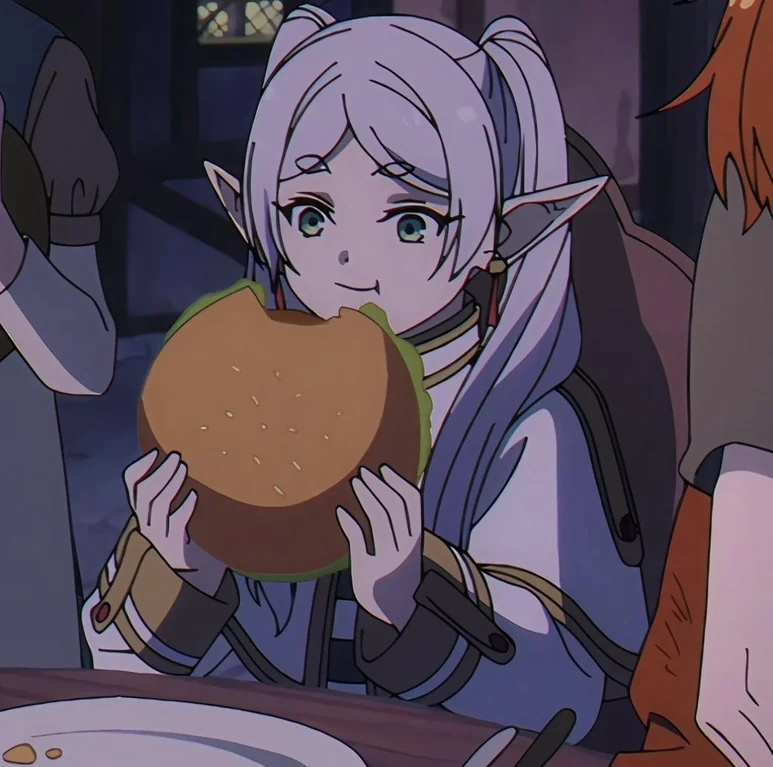

In [6]:
from PIL import Image
import requests

image_url = "https://raw.githubusercontent.com/vikhyat/moondream/main/assets/demo-1.jpg"
Image.open(requests.get(image_url, stream=True).raw)


You can pass in a url or the path to an image file.

In [7]:
image = "https://raw.githubusercontent.com/vikhyat/moondream/main/assets/demo-1.jpg"
prompt = "Caption this image."

model.infer(image, prompt)

'An anime-style illustration depicts a young girl with white hair and green eyes, wearing a white jacket, holding a large burger in her hands and smiling.'

If you'd like to generate a longer caption, you can do so by setting the `max_new_tokens` parameter. You can also pass in any generation parameters supported by the `transformers` library.

In [8]:
image = "https://raw.githubusercontent.com/vikhyat/moondream/main/assets/demo-1.jpg"
prompt = "Caption this image highlighting the focus of the image and the background in detail."

model.infer(image, prompt, max_new_tokens=500)

'The image depicts a young girl with long, white hair and blue eyes sitting at a table, holding a large burger in her hands. The background shows a cozy indoor setting with a window and a chair visible.'

If you'd like to see the inference stats, you can do so by calling the `print_stats` method. This might be useful if you're running some sort of benchmark on the inference time.

In [9]:
model.stats.print_stats()

                    Model Stats                    
╭───────────────────────────┬─────────────────────╮
│ Attribute                 │ Value               │
├───────────────────────────┼─────────────────────┤
│ Model ID                  │ vikhyatk/moondream2 │
│ Device                    │ cuda                │
│ Dtype                     │ torch.float16       │
│ Number of Inferences      │ 2                   │
│ Total Inference Time (ms) │ 2087.3517           │
│ Average Latency (ms)      │ 1043.6759           │
╰───────────────────────────┴─────────────────────╯

Finally, you can also run batch inference. You'll have to pass in a list of images and prompts.

In [10]:
model.infer_batch([image, image], [prompt, prompt])

['The image depicts a young girl with long, white hair and blue eyes sitting at a table, holding a large burger in her hands. The background shows a cozy indoor setting with a window and a chair visible.',
 'The image depicts a young girl with long, white hair and blue eyes sitting at a table, holding a large burger in her hands. The background shows a cozy indoor setting with a window and a chair visible.']

For convenience, you can also launch a Gradio interface to interact with the model.

In [11]:
model.launch_gradio()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


That's it! You've successfully run inference with x.infer. 

Hope this simplifies the process of running inference with your favorite computer vision models!

<div align="center">
    <img src="https://raw.githubusercontent.com/dnth/x.infer/refs/heads/main/assets/github_banner.png" alt="x.infer" width="600"/>
    <br />
    <br />
    <a href="https://dnth.github.io/x.infer" target="_blank" rel="noopener noreferrer"><strong>Explore the docs »</strong></a>
    <br />
    <a href="#quickstart" target="_blank" rel="noopener noreferrer">Quickstart</a>
    ·
    <a href="https://github.com/dnth/x.infer/issues/new?assignees=&labels=Feature+Request&projects=&template=feature_request.md" target="_blank" rel="noopener noreferrer">Feature Request</a>
    ·
    <a href="https://github.com/dnth/x.infer/issues/new?assignees=&labels=bug&projects=&template=bug_report.md" target="_blank" rel="noopener noreferrer">Report Bug</a>
    ·
    <a href="https://github.com/dnth/x.infer/discussions" target="_blank" rel="noopener noreferrer">Discussions</a>
    ·
    <a href="https://dicksonneoh.com/" target="_blank" rel="noopener noreferrer">About</a>
</div>